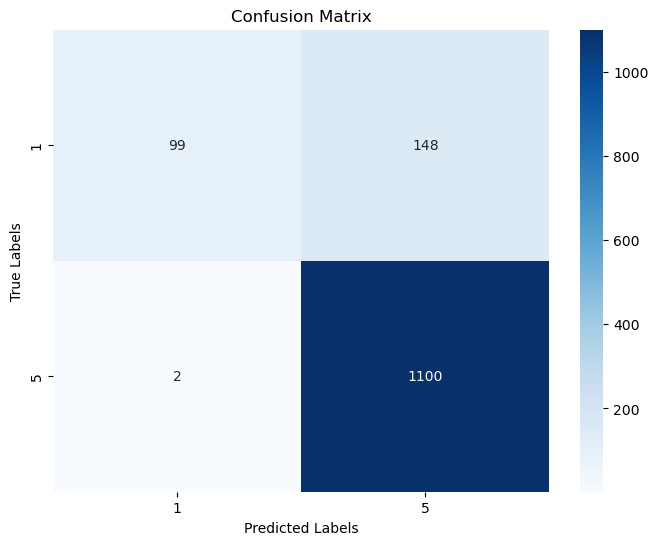

Classification Report:
               precision    recall  f1-score   support

           1       0.98      0.40      0.57       247
           5       0.88      1.00      0.94      1102

    accuracy                           0.89      1349
   macro avg       0.93      0.70      0.75      1349
weighted avg       0.90      0.89      0.87      1349



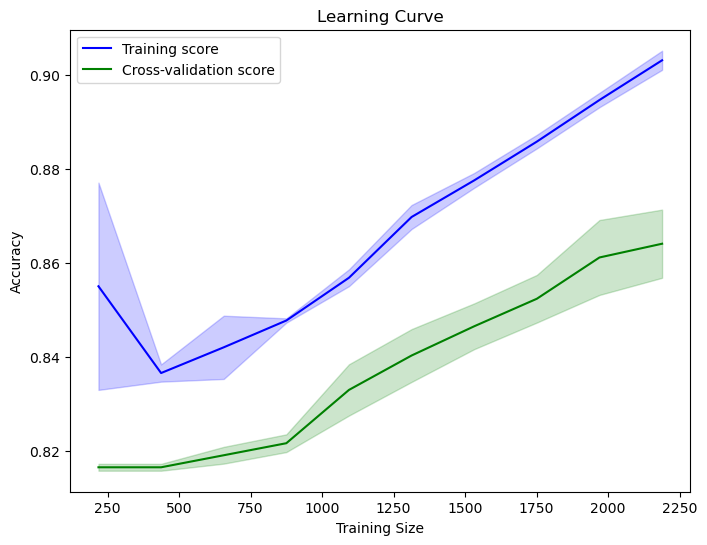

Cross-validation scores: [0.87775061 0.88127295 0.90452876 0.90697674 0.89228886]
Mean Cross-validation score: 0.8926


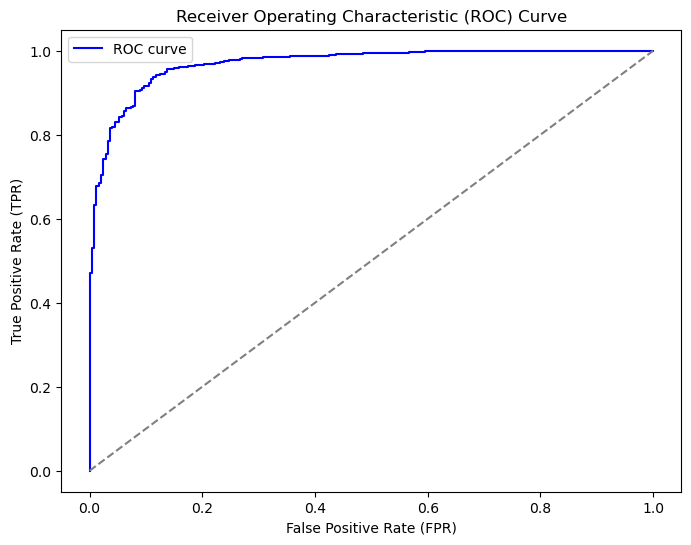

Area Under Curve (AUC): 0.9692


In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.preprocessing import LabelBinarizer

# Load the Yelp data
yelp = pd.read_csv('D:\Placements\key academic projects\Optimization Algorithms in ML\yelp.csv')

# Filter out 1-star and 5-star reviews
yelp_class = yelp[(yelp['stars'] == 1) | (yelp['stars'] == 5)]
X = yelp_class['text']
y = yelp_class['stars']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

# Create a pipeline with Logistic Regression, CountVectorizer, and TfidfTransformer
pipe = Pipeline([
    ('bow', CountVectorizer()),             # Tokenization and Count Vectorization
    ('tfidf', TfidfTransformer()),          # TF-IDF transformation
    ('model', LogisticRegression())         # Logistic Regression model
])

# Fit the model to the training data
pipe.fit(X_train, y_train)

# Make predictions on the test data
predictions = pipe.predict(X_test)

# --- 1. Confusion Matrix ---
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[1, 5], yticklabels=[1, 5])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# --- 2. Classification Report ---
print("Classification Report:\n", classification_report(y_test, predictions))

# --- 3. Learning Curve ---
train_sizes, train_scores, test_scores = learning_curve(
    pipe, X_train, y_train, cv=5, scoring='accuracy', 
    train_sizes=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
)

# Calculate the mean and standard deviation of training and test scores
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
test_std = test_scores.std(axis=1)

# Plot learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label="Training score", color='blue')
plt.plot(train_sizes, test_mean, label="Cross-validation score", color='green')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color='green')
plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

# --- 4. Cross Validation Scores ---
cv_scores = cross_val_score(pipe, X, y, cv=5, scoring='accuracy')

# Print the cross-validation scores
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean Cross-validation score: {cv_scores.mean():.4f}')

# --- 5. ROC Curve ---
# Binarize the output labels for ROC curve
lb = LabelBinarizer()
y_bin_train = lb.fit_transform(y_train)
y_bin_test = lb.transform(y_test)

# Get predicted probabilities
y_pred_prob = pipe.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_bin_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='best')
plt.show()

# Compute AUC (Area Under Curve)
roc_auc = roc_auc_score(y_bin_test, y_pred_prob)
print(f'Area Under Curve (AUC): {roc_auc:.4f}')
